# Crime reduction from 1994 to 2013
**Authors:** Ryszard Madej & Katherine Kustas

**Summary**: 

This project investigates a number of questions about the nature of crime in America in the last 20 years (1994 – 2013 available data):

1) What crimes have been most prevalent in the past twenty years?

2) Which years saw the largest drop in crime in the US?

3) What factors contributed to the decline in crime rates?


**Data Sources**:

The data from this project is sourced from the Federal Bureau of Investigation (FBI), the domestic intelligence and security service of the United States, which simultaneously serves as the nation's prime federal law enforcement agency. The data consists of tables providing the estimated number of offenses and the rate (per 100,000 inhabitants) of crime in the United States for 1994 through 2013, as well as the 2-, 5-, and 10-year trends for 2013 based on these estimates.

The data used in creating these tables were from all law enforcement agencies participating in the UCR Program (including those submitting less than 12 months of data).

The crime statistics for the nation include estimated offense totals (except arson) for agencies submitting less than 12 months of offense reports for each year.

Important to note is that only data provided under the legacy definition of rape are shown in this table. (Calculating rape trends with the data provided under the revised definition of rape would not be possible, as there is currently only one year of data available.)

In addition, data from the Center for Disease Control and Prevention (CDC) is also used to compare against our data from the FBI. The survey we used, the Youth Risk Behavior Surveillance System (YRBSS), monitors six types of health-risk behaviors that contribute to the leading causes of death and disability among youth and adults, including— 

* Behaviors that contribute to unintentional injuries and violence
* Sexual behaviors related to unintended pregnancy and sexually transmitted diseases, including HIV infection
* Alcohol and other drug use
* Tobacco use
* Unhealthy dietary behaviors
* Inadequate physical activity

The survey was conducted by the CDC in conjunction with state, territorial, and local education and health agencies and tribal governments.

In [395]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt        # pyplot module
import datetime as dt                  # date and time module
import numpy as np


# make plots show up in notebook
%matplotlib inline                     


# Data frames

In [407]:
#import data and then display each data frame

path1 = 'data/fbi_table_20years.xlsx'
df_20yr = pd.read_excel(path1,
                       index_col=0)

path2 = 'data/fbi_table_20years_edited.xlsx'
df_20yr_real = pd.read_excel(path2,
                            index_col=0)

path3 = 'data/fbi_table_20years_rates.xlsx'
df_20yr_rates = pd.read_excel(path3,
                             index_col=0)

path4 = 'data/CDS_Data.xlsx'
df_CDC = pd.read_excel(path4,
                       index_col=0)

In [19]:
df_20yr

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition)2,Rape (legacy definition)2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1994,260327021,1857670,713.6,23326,9.0,102216,39.3,618949,237.8,1113179,427.6,12131873,4660.2,2712774,1042.1,7879812,3026.9,1539287,591.3
1,1995,262803276,1798792,684.5,21606,8.2,97470,37.1,580509,220.9,1099207,418.3,12063935,4590.5,2593784,987.0,7997710,3043.2,1472441,560.3
2,1996,265228572,1688540,636.6,19645,7.4,96252,36.3,535594,201.9,1037049,391.0,11805323,4451.0,2506400,945.0,7904685,2980.3,1394238,525.7
3,1997,267783607,1636096,611.0,18208,6.8,96153,35.9,498534,186.2,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
4,1998,270248003,1533887,567.6,16974,6.3,93144,34.5,447186,165.5,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9
5,1999,272690813,1426044,523.0,15522,5.7,89411,32.8,409371,150.1,911740,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5
6,2000,281421906,1425486,506.5,15586,5.5,90178,32.0,408016,145.0,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
7,2001,285317559,1439480,504.5,16037,5.6,90863,31.8,423557,148.5,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5
8,2002,287973924,1423677,494.4,16229,5.6,95235,33.1,420806,146.1,891407,309.5,10455277,3630.6,2151252,747.0,7057379,2450.7,1246646,432.9
9,2003,290788976,1383676,475.8,16528,5.7,93883,32.3,414235,142.5,859030,295.4,10442862,3591.2,2154834,741.0,7026802,2416.5,1261226,433.7


In [428]:
df_20yr_real

,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Burglary,Larceny- theft,Motor vehicle theft,Percent Change
Year,,,,,,,,
1994,23326,102216,618949,1113179,2712774,7879812,1539287,0.000000
1995,21606,97470,580509,1099207,2593784,7997710,1472441,0.906506
1996,19645,96252,535594,1037049,2506400,7904685,1394238,2.660833
1997,18208,96153,498534,1023201,2460526,7743760,1354189,2.217986
1998,16974,93144,447186,976583,2332735,7376311,1242781,5.372338
1999,15522,89411,409371,911740,2100739,6955520,1152075,6.818481
2000,15586,90178,408016,911706,2050992,6971590,1160002,0.226123
2001,16037,90863,423557,909023,2116531,7092267,1228391,0.000000
2002,16229,95235,420806,891407,2151252,7057379,1246646,0.000000


In [112]:
df_20yr_rates

,Murder and nonnegligent manslaughter rate,Rape (legacy definition)2 rate,Robbery rate,Aggravated assault rate,Burglary rate,Larceny- theft rate,Motor vehicle theft rate
Year,,,,,,,
1994,9.0,39.3,237.8,427.6,1042.1,3026.9,591.3
1995,8.2,37.1,220.9,418.3,987.0,3043.2,560.3
1996,7.4,36.3,201.9,391.0,945.0,2980.3,525.7
1997,6.8,35.9,186.2,382.1,918.8,2891.8,505.7
1998,6.3,34.5,165.5,361.4,863.2,2729.5,459.9
1999,5.7,32.8,150.1,334.3,770.4,2550.7,422.5
2000,5.5,32.0,145.0,324.0,728.8,2477.3,412.2
2001,5.6,31.8,148.5,318.6,741.8,2485.7,430.5
2002,5.6,33.1,146.1,309.5,747.0,2450.7,432.9


In [408]:
df_CDC

,Ever drank alcohol,Rarely wore a bicycle helmet,Ever tried smoking,Ever had intercourse
1991,81.6,96.2,70.1,54.1
1993,80.9,92.8,69.5,53.0
1995,80.4,92.8,71.3,53.1
1997,79.1,88.4,70.2,48.4
1999,81.0,85.3,70.4,49.9
2001,78.2,84.7,63.9,45.6
2003,74.9,85.9,58.4,46.7
2005,74.3,83.4,54.3,46.8
2007,75.0,85.1,50.3,47.8
2009,72.5,84.7,46.3,46.0


# Line Chart: Crime rate (1994-2013)

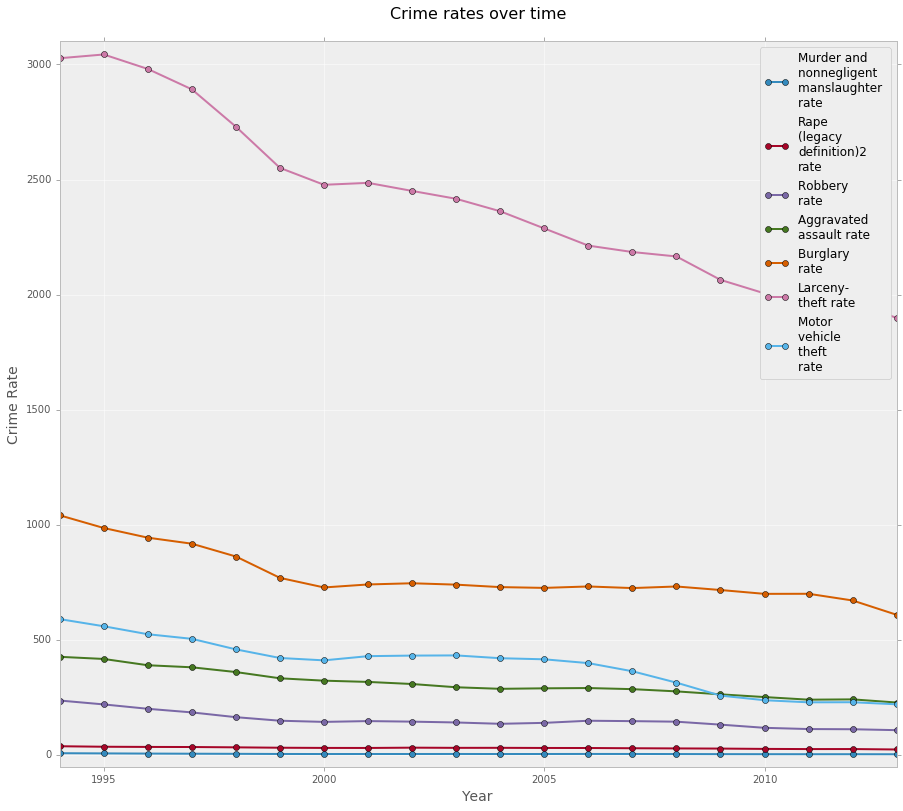

In [435]:
#create a line plot from crime rates data frame

fig, ax = plt.subplots()
df_20yr_rates.plot(ax=ax,
        kind='line',                 # line plot
        title='Different Crimes vs. Time\n\n',
        grid = True,
        ylim = (-50,3100),
        marker = 'o',
        use_index = True)  

plt.legend(loc = 'upper right')
ax.set_title('Crime rates over time\n',fontsize = 16)         #format title and axis labels
ax.set_xlabel('Year', fontsize = 14)                
ax.set_ylabel('Crime Rate', fontsize = 14)
ax.set_xlim(1994, 2013)        #set limits for x and y axis
ax.set_ylim(-50,3100)
fig.set_size_inches(15, 13)

**Analysis:**

In the above graph, we can observe a steady decline (despite a few isolated increases) in crime rates across different categories of crime from 1994 to 2013. A number of explanations have been proposed to explain the trend. Historian Neil Howe has suggested that decline might come from the entrance of millennials into the potential criminal demographic. Both will be explored in further detail later in this project.

# Pie Chart: Breakdown of crime type

In [ ]:
#find totals of each column in order to find which crime was most prevalent over the course of the past 20 years

murder_total = 0
rape_total = 0
robbery_total = 0
agg_ass_total = 0
burglary_total = 0
larceny_total = 0
veh_total = 0

totals_list = []
list_total = 0

#find total number of murders
for i in (df_20yr_real.index):
    murder_total += df_20yr_real['Murder and\nnonnegligent \nmanslaughter'][i]
    list_total += murder_total
totals_list.append(murder_total)

#find total number of rapes
for i in (df_20yr_real.index):
    rape_total += df_20yr_real['Rape\n(legacy\ndefinition)2'][i]
    list_total += rape_total
totals_list.append(rape_total)

#find total number of robberies
for i in (df_20yr_real.index):
    robbery_total += df_20yr_real['Robbery'][i]
    list_total += robbery_total
totals_list.append(robbery_total)

#find total number of assaults
for i in (df_20yr_real.index):
    agg_ass_total += df_20yr_real['Aggravated \nassault'][i]
    list_total += agg_ass_total
totals_list.append(agg_ass_total)

#find total number of burglaries
for i in (df_20yr_real.index):
    burglary_total += df_20yr_real['Burglary'][i]
    list_total += burglary_total
totals_list.append(burglary_total)

#find total number of larcenies
for i in (df_20yr_real.index):
    larceny_total += df_20yr_real['Larceny-\ntheft'][i]
    list_total += larceny_total
totals_list.append(larceny_total)

#find total number of vehicle thefts
for i in (df_20yr_real.index):
    veh_total += df_20yr_real['Motor \nvehicle \ntheft'][i]
    list_total += veh_total
totals_list.append(veh_total)

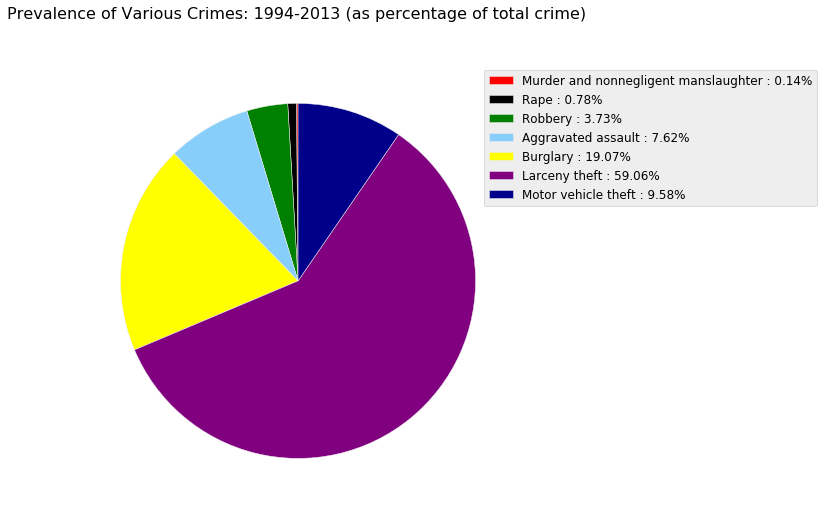

In [431]:
#plot pie chart using above data

k = ['Murder and nonnegligent manslaughter', 'Rape', 'Robbery', 'Aggravated assault', 'Burglary', \
     'Larceny theft', 'Motor vehicle theft']
percent_list = []
for i in totals_list:
    percent = i/list_total
    percent_list.append(percent)     #convert values to percentages

arr =  np.array(percent_list)
percent = 100.*arr/arr.sum()
labels = ['{0} : {1:1.2f}%'.format(x,y) for x,y in zip(k, percent)]
colours = ['red','black', 'green', 'lightskyblue', 'yellow', 'purple', 'darkblue']      #style the pie chart
patches, texts = plt.pie(totals_list, colors=colours, startangle=90)
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)
plt.legend(patches, labels,  loc="best", bbox_to_anchor=(1.02, 0.94), borderaxespad=0)
plt.axis('equal')
plt.title('Prevalence of Various Crimes: 1994-2013 (as percentage of total crime)\n', fontsize = 16)
plt.tight_layout()
plt.show()

**Analysis:**

Here we can see the relative prevalence of various types of crime in the United States. Larceny theft accounts for over 50% of the crime committed in the US over the relevant 20-year period followed by burglary and motor vehicle theft contributing about 19% and about 10%, respectively. Rape, murder, aggravated assault, and robbery each contributed about 1%, 0.14%, about 8% and around 4% as well.

# Bar Graph: Yearly percent change in total crime (1994-2013)

In [427]:
#calculate total number of crimes per year

row_total = 0
row_total_list = []
count = 0

for i in (df_20yr_real.index):
    for x in (df_20yr_real.columns):
        row_total += df_20yr_real[x][i]
    row_total_list.append(row_total)
    row_total = 0

#calculate percent change in crimes between each year and then add to new column in data frame     
percent_change_list = []

for k in range(0,len(row_total_list)):
    if k > 0:
        percent_change = (((row_total_list[k]/row_total_list[k-1]) - 1) * -1) * 100
        if percent_change < 0:
            percent_change = 0.0
        percent_change_list.append(percent_change)
        count+=1
    else:
        percent_change_list.append(0.0)
        count+=1

# add the percent change column to our data frame

#df_20yr_real['Percent Change'] = percent_change_list
#del df_20yr_real['Percent Change']

(0, 7)

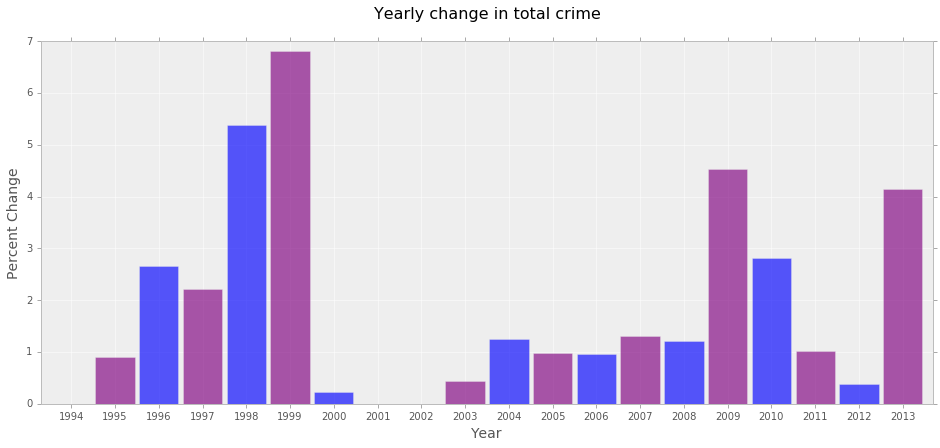

In [430]:
#plot bar graph using above percent change data

fig, ax = plt.subplots()
fig.set_size_inches(16, 6.5)
df_20yr_real['Percent Change'].plot(kind='bar', 
                                    ax=ax,
                                   legend = False,
                                   color = ['blue','purple'],
                                   alpha = 0.65,
                                   rot = 0,
                                   width = 0.9,
                                   align = 'center') 
plt.style.use('bmh')
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Percent Change', fontsize = 14)                    #style bar graph
ax.set_title('Yearly change in total crime\n', fontsize = 16)
ax.set_ylim(0,7)


**Analysis:**

We can see from the above bar chart that there was a substantial decrease in crime during the year 1997 and 1998, this could be attributed to a number of increasingly rigorous policing tactics around the country, Bratton’s Zero Tolerance policing in New York City for example. 

In addition to stricter policing which, according to some sources was controversial and led to an increase in dissent and crime, there was a large influx of millennials into the criminal age demographic (approximately 12-24 years of age) at which they are most likely to commit or be victims of violent crime. 

# Line Chart: High schoolers partaking in risky behaviors

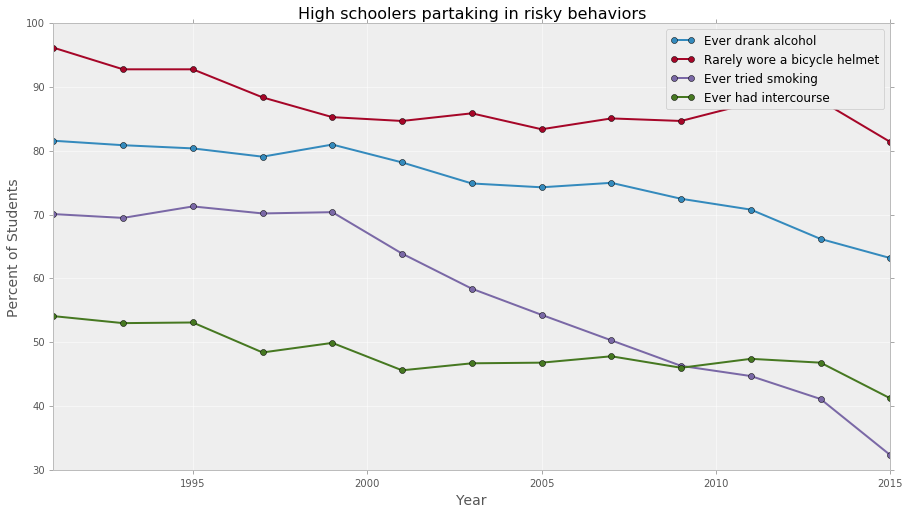

In [434]:
#create a line plot from CDC data frame

fig, ax = plt.subplots()
df_CDC.plot(ax=ax,
        kind='line',                 # line plot
        grid = True,
        marker = 'o',
        use_index = True)

plt.legend(loc = 'upper right')         #format legend
ax.set_title('High schoolers partaking in risky behaviors',fontsize = 16)      #format title and axis labels
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Percent of Students', fontsize = 14)
fig.set_size_inches(15, 8)

**Analysis:**

The above line graphs show the total crime in the United States graphed against some key indicators in the CDC Youth Risk Behavior Survey. In the graph above, it can be seen that High School age youths are partaking in “risky” behaviors at increasingly lower rates over the last twenty years. We have plotted the percentage of high school youths that have ever drank a beer, rarely wore a helmet when biking, ever tried smoking a cigarette, and ever had sexual intercourse – indicators of risky behavior among teenagers.

As the percentage of US high schoolers partaking in these risky activities decreases we see a correlating decline in crime in the United States. The entrance of millennials – increasingly looked after, sheltered, and advised to not take risks – at least partially helps to explain the sharp decline in crime rates during the late 90’s that has persisted to the present day.

# Conclusion
The influx of a less risky, milder generation has defined the criminal scene for the last two decades – encouraging more responsible behavior among our youth has to some degree resulted in a decline in crime. It is, therefore, obvious that building a safer country depends on cultivating today’s youth, ensuring that they are given opportunities and support to pursue more constructive and less risky behaviors. This will help us create a productive generation of citizens that propels the United States into a safer future. 